In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
from scipy.stats import spearmanr

import pylab

In [2]:
df = pd.DataFrame()

In [3]:
df['year'] = [1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009]
df['science'] = [18079, 18594, 19553, 20734, 20831, 23029, 23597, 23584, 25525, 27731, 29449]
df['suicide'] = [5427, 5688, 6198, 6462, 6635, 7336, 7248, 7491, 8161, 8578, 9000]

In [4]:
df

,year,science,suicide
0,1999,18079,5427
1,2000,18594,5688
2,2001,19553,6198
3,2002,20734,6462
4,2003,20831,6635
5,2004,23029,7336
6,2005,23597,7248
7,2006,23584,7491
8,2007,25525,8161
9,2008,27731,8578


In [5]:
df = df.set_index('year')
df.head(10)

,science,suicide
year,,
1999,18079,5427
2000,18594,5688
2001,19553,6198
2002,20734,6462
2003,20831,6635
2004,23029,7336
2005,23597,7248
2006,23584,7491
2007,25525,8161


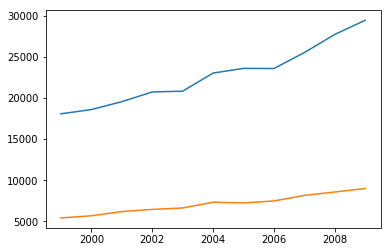

In [6]:
import matplotlib.pyplot as plt
plt.plot(df.index, df.science)
plt.plot(df.index, df.suicide)
plt.show()

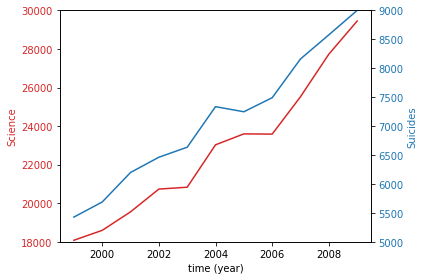

In [7]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (year)')
ax1.set_ylabel('Science', color=color)
ax1.plot(df.index, df.science, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([18000,30000])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Suicides', color=color)  # we already handled the x-label with ax1
ax2.plot(df.index, df.suicide, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([5000,9000])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
pylab.savefig('science_suicides.png')
plt.show()


In [8]:
pearsonr(df.science, df.suicide)

(0.9917594639650054, 2.4214860439448308e-09)

In [9]:
spearmanr(df.science, df.suicide)

SpearmanrResult(correlation=0.9727272727272729, pvalue=5.14217704904919e-07)

In [10]:
np.corrcoef(df.science, df.suicide)

array([[1.        , 0.99175946],
       [0.99175946, 1.        ]])

In [11]:
df2 = df.diff()
df2 = df2.drop(df2.index[0])
df2.head(12)

,science,suicide
year,,
2000,515.0,261.0
2001,959.0,510.0
2002,1181.0,264.0
2003,97.0,173.0
2004,2198.0,701.0
2005,568.0,-88.0
2006,-13.0,243.0
2007,1941.0,670.0
2008,2206.0,417.0


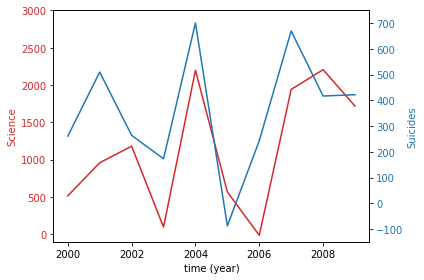

In [12]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (year)')
ax1.set_ylabel('Science', color=color)
ax1.plot(df2.index, df2.science, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([-100,3000])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Suicides', color=color)  # we already handled the x-label with ax1
ax2.plot(df2.index, df2.suicide, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([-150,750])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
pylab.savefig('science_suicides.png')
plt.show()


In [13]:
pearsonr(df2.science, df2.suicide)

(0.7318189187943297, 0.016130109050321348)

In [14]:
spearmanr(df2.science, df2.suicide)

SpearmanrResult(correlation=0.7454545454545454, pvalue=0.013330146315440047)